In [1]:
import eotdl

eotdl.__version__

'2025.04.02-4'

Stage the model

In [2]:
from eotdl.models import stage_model

path = stage_model('RoadSegmentation', path="data", version=2, force=True, assets=True)
model = f'{path}/model.onnx'

model

Staging assets: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


'data/RoadSegmentation/model.onnx'

Prepare the inputs

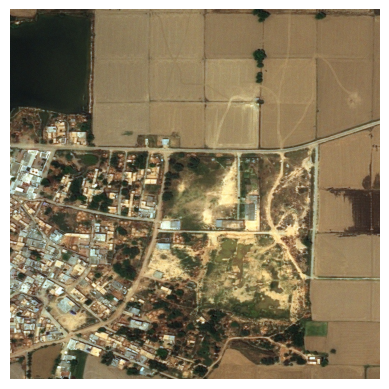

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = 'assets/deep_globe.jpg' 

img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
import numpy as np

imgs = np.array(img).transpose(2, 0, 1)[np.newaxis, ...].astype(np.float32) / 255.

imgs.shape, imgs.dtype, imgs.min(), imgs.max()

((1, 3, 1024, 1024), dtype('float32'), np.float32(0.0), np.float32(1.0))

Load and run the model

In [7]:
import onnxruntime
import numpy as np

ort_session = onnxruntime.InferenceSession(model)
input_name = ort_session.get_inputs()[0].name


ort_inputs = {input_name: imgs} 
ort_outs = ort_session.run(None, ort_inputs)
mask = ort_outs[0] > 0

Visualize the results

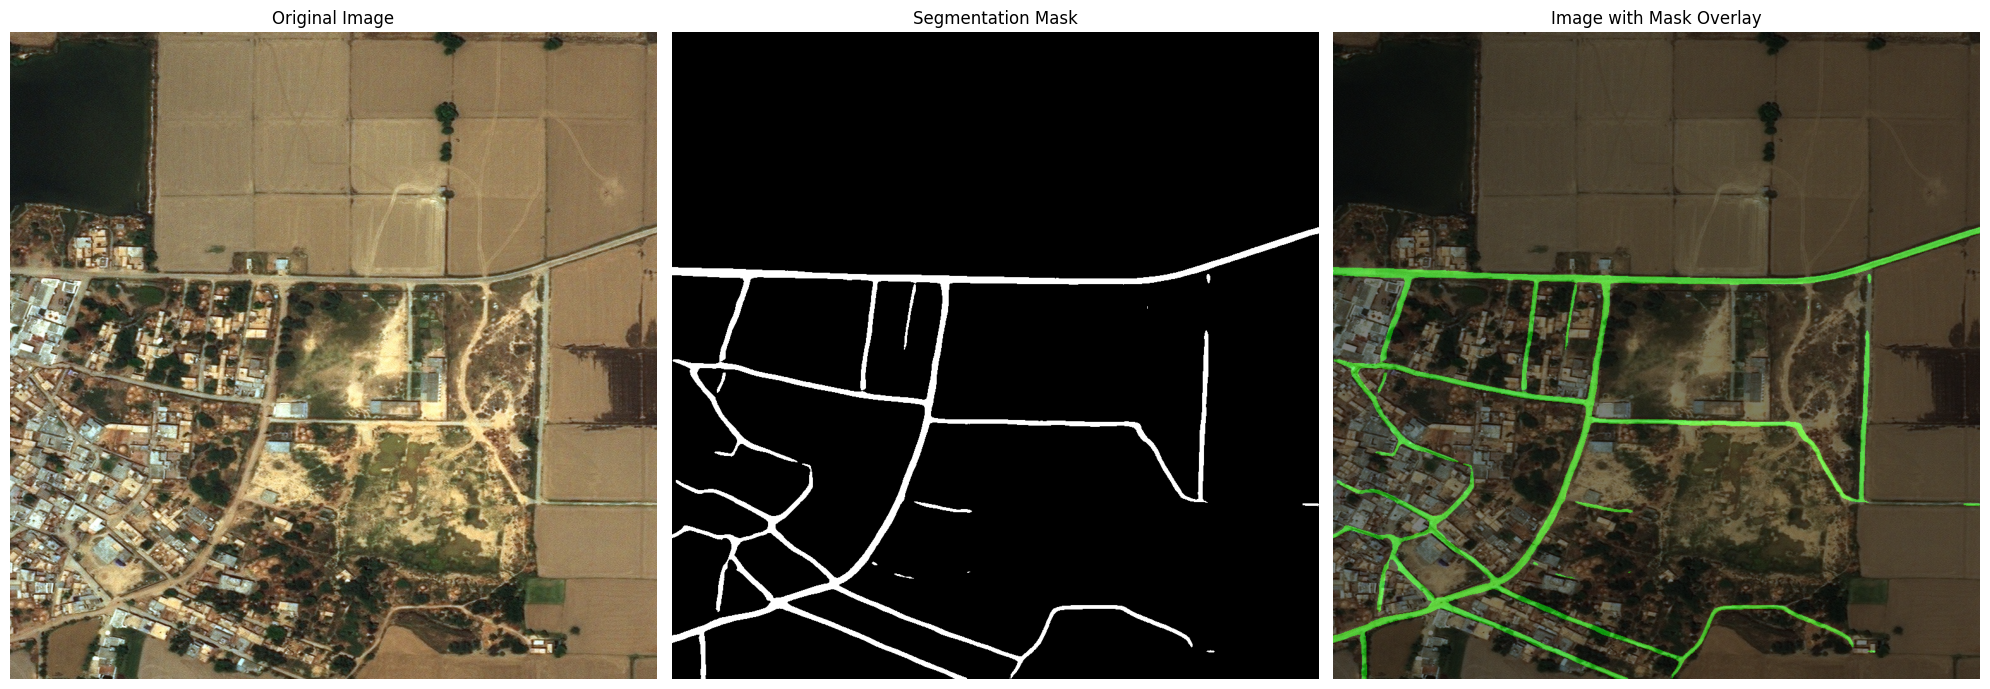

In [8]:
# Squeeze the mask to remove extra dimensions
mask_squeezed = np.squeeze(mask)

# Create a figure with 3 subplots in a row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

# Plot the original image
ax1.imshow(img)
ax1.axis('off')
ax1.set_title('Original Image')

# Plot the segmentation mask
ax2.imshow(mask_squeezed, cmap='gray')
ax2.axis('off')
ax2.set_title('Segmentation Mask')

# Plot the image with mask overlay
overlay = np.zeros_like(img)
overlay[:, :, 1] = mask_squeezed * 255  # Green channel for the mask
ax3.imshow(img)
ax3.imshow(overlay, alpha=0.5)
ax3.axis('off')
ax3.set_title('Image with Mask Overlay')

plt.tight_layout()
plt.show()
